In [7]:
from matplotlib.pyplot import xlabel

print(1+2)


3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('StudentsPerformance.csv')
#df[(df['gender']=='male')& (df['race/ethnicity'].isin(['group A','group B','group C']))]
df_pivot=df.pivot_table(index='gender',values=['math score','reading score','writing score'],aggfunc='mean')
print(df_pivot)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<Axes: xlabel='Country/Territory'>

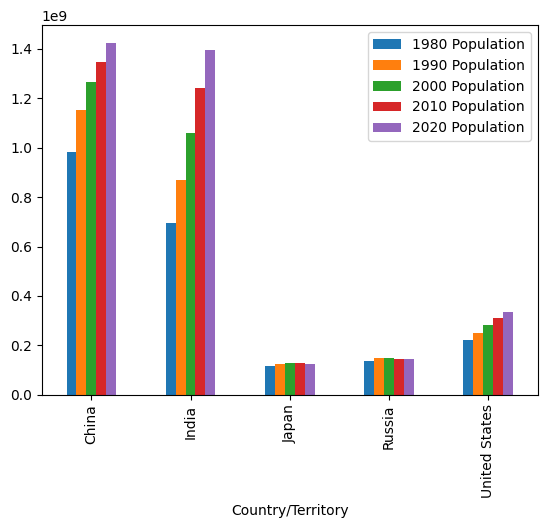

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('world_population.csv')
countries=['India', 'China', 'United States', 'Russia','Japan']
df_new=df[df['Country/Territory'].isin(countries)]
df_new=df_new.pivot_table(index='Country/Territory',values=['1980 Population','1990 Population','2000 Population','2010 Population','2020 Population'])
df_new.plot(kind='bar')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Car_sales.csv')
df=df[['Manufacturer','Sales_in_thousands',
       'Vehicle_type','Engine_size',
       'Horsepower','Fuel_capacity']]
df.agg('mean',numeric_only=True)
df.agg(['sum','count','max','min'])
df.agg({'Sales_in_thousands':['sum','max'],
        'Horsepower':['min','max']
        })


,Sales_in_thousands,Horsepower
sum,8320.698,NaN
max,540.561,450.0
min,NaN,55.0


In [5]:
# SPLIT
passenger_filter=df['Vehicle_type']=='Passenger'
car_filter=df['Vehicle_type']=='Car'

In [6]:
#APPLY
passenger_avg=df[passenger_filter]['Sales_in_thousands'].mean()
car_avg=df[car_filter]['Sales_in_thousands'].mean()

In [7]:
#COMBINE
pd.DataFrame({
            'Vehicle_type':['Passenger','Car'],
            'Sales_in_thousands':[passenger_avg,car_avg]
})

,Vehicle_type,Sales_in_thousands
0,Passenger,43.234345
1,Car,80.622293


In [8]:
df.groupby('Vehicle_type').agg({ 'Sales_in_thousands':['sum'],
                                 'Horsepower':['mean']
})

,Sales_in_thousands,Horsepower
,sum,mean
Vehicle_type,,
Car,3305.514,186.400000
Passenger,5015.184,185.793103


In [19]:
def filtered_func(x):
    return x['Sales_in_thousands']>20

df_filter=df.groupby(['Sales_in_thousands']).filter(filtered_func)
df_filter

,Manufacturer,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Fuel_capacity,price_tax
1,Acura,39.384,Passenger,3.2,225.0,17.2,44.11008
4,Audi,20.397,Passenger,1.8,150.0,16.4,22.84464
10,Buick,91.561,Passenger,3.1,175.0,17.5,102.54832
11,Buick,39.350,Passenger,3.8,240.0,17.5,44.07200
12,Buick,27.851,Passenger,3.8,205.0,18.5,31.19312
...,...,...,...,...,...,...,...
142,Toyota,25.106,Car,2.0,127.0,15.3,28.11872
143,Toyota,68.411,Car,2.7,150.0,18.5,76.62032
146,Volkswagen,83.721,Passenger,2.0,115.0,14.5,93.76752
147,Volkswagen,51.102,Passenger,1.8,150.0,16.4,57.23424


In [56]:
def filtered_func(x):
    if x['Horsepower'] < 150:
        return 'Low'
    elif (x['Horsepower'] > 150)  & (x['Horsepower'] < 200):
        return 'Medium'
    else:
        return 'High'

df['HP_tiers']=df.apply(filtered_func,axis=1)

In [1]:
df_1=df.groupby('Manufacturer')['Horsepower'].agg(['mean','max','min'],numeric_only=True)
df_1

NameError: name 'df' is not defined

In [1]:
df_sample=df.sample(frac=0.5)
print(df.shape)
print(df_sample.shape)
df_conc_vertical=pd.concat([df,df_sample])
df_conc_vertical

NameError: name 'df' is not defined

In [3]:
import pandas as pd
customers = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'Name': ['Aarav', 'Vikram', 'Sara', 'Meera', 'Joseph'],
    'City': ['Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Delhi']
})
customers

,CustomerID,Name,City
0,1,Aarav,Delhi
1,2,Vikram,Mumbai
2,3,Sara,Chennai
3,4,Meera,Hyderabad
4,5,Joseph,Delhi


In [5]:
orders = pd.DataFrame({
    'OrderID': [101, 102, 103, 104, 105, 106],
    'CustomerID': [1, 2, 2, 4, 6, 7],
    'Amount': [500, 1200, 800, 450, 900, 300]
})
orders

,OrderID,CustomerID,Amount
0,101,1,500
1,102,2,1200
2,103,2,800
3,104,4,450
4,105,6,900
5,106,7,300


In [13]:
df_left_join=pd.merge(customers,orders,on='CustomerID',how='left')
df_left_join


,CustomerID,Name,City,OrderID,Amount
0,1,Aarav,Delhi,101.0,500.0
1,2,Vikram,Mumbai,102.0,1200.0
2,2,Vikram,Mumbai,103.0,800.0
3,3,Sara,Chennai,NaN,NaN
4,4,Meera,Hyderabad,104.0,450.0
5,5,Joseph,Delhi,NaN,NaN


In [1]:
df_inner_join=pd.merge(customers,orders,on='CustomerID',how='inner')
df_inner_join

NameError: name 'pd' is not defined

In [1]:
import pandas as pd
df_ipl=pd.read_csv('IPL dataset final.csv')
for columns in df_ipl.columns:
    percentage=df_ipl[columns].isnull().mean()
    print(columns+': '+str(percentage*100))

Player: 0.0
COUNTRY: 0.0
TEAM: 0.0
AGE: 0.0
CAPTAINCY EXP: 0.0
Paying_Role: 0.0
Mat: 0.0
Inns: 31.318681318681318
Runs: 31.318681318681318
BF: 31.318681318681318
HS: 31.318681318681318
Avg: 30.76923076923077
SR: 31.318681318681318
NO: 31.318681318681318
4s: 31.318681318681318
6s: 31.318681318681318
0s: 31.868131868131865
50s: 31.868131868131865
100s: 31.868131868131865
TMat: 35.16483516483517
TInns: 56.043956043956044
TRuns: 56.043956043956044
TBF: 56.043956043956044
THS: 56.043956043956044
TAvg: 56.043956043956044
TSR: 56.043956043956044
TNO: 56.043956043956044
T4s: 56.043956043956044
T6s: 56.043956043956044
T0s: 56.043956043956044
T50s: 56.043956043956044
T100s: 56.043956043956044
B_Inns: 36.81318681318682
B_Balls: 37.362637362637365
B_Runs: 36.81318681318682
B_Maidens: 37.362637362637365
B_Wkts: 36.81318681318682
B_Avg: 36.81318681318682
B_Econ: 36.81318681318682
B_SR: 36.81318681318682
B_4w: 36.81318681318682
B_5w: 36.81318681318682
B_TInns: 57.14285714285714
B_TBalls: 57.142857142

<Axes: ylabel='Frequency'>

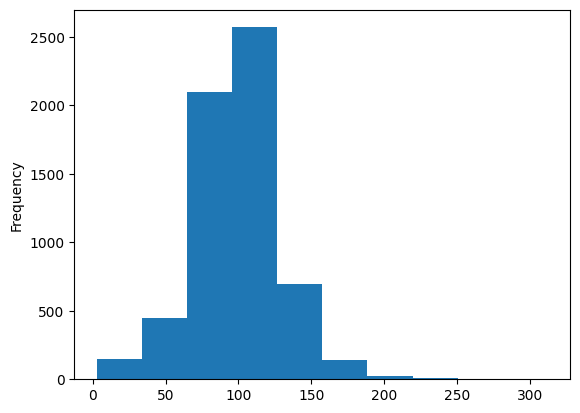

In [48]:
import pandas as pd
df_netflix=pd.read_csv('netflix_titles.csv')
df_movie=df_netflix[df_netflix['type']=='Movie'].copy()
#df_movie[['month','date','year']]=df_movie['date_added'].str.split(' ',expand=True)
#df_movie['date_added'].str.extract('(\d{4})')
df_movie[['mins','units']]=df_movie['duration'].str.split(' ',expand=True)
df_movie['mins'] = pd.to_numeric(df_movie['mins'])
df_movie['mins'].plot(kind='hist',bins=10)


RMSE: 13560.554446927623
MAE: 9480.230629255175
R2: 0.9114830575573357


Text(0, 0.5, 'Salary')

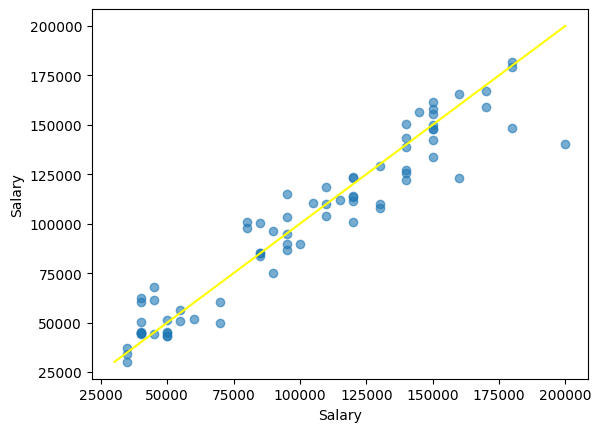

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df_salary = pd.get_dummies(df_salary, drop_first=True)
df_salary.dropna( inplace=True)

X=df_salary.drop('Salary',axis=1)
y=df_salary['Salary']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mea=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("RMSE:",rmse)
print("MAE:",mea)
print("R2:",r2)

plt.scatter(y_test,y_pred,alpha=0.6)
m=min(y_test.min(),y_pred.min())
M=max(y_test.max(),y_pred.max())
plt.plot([m,M],[m,M],color='yellow')
plt.xlabel('Salary')
plt.ylabel('Salary')

